In [1]:
import pqmodel
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [103]:
num_total_samples = 1200
num_test = 200
imbalance_ratio = 0.5 # Ratio of normal samples
sampling_frequency = 16000
fundemental_frequency = 50
num_cycles = 10
amplitude = 1
alternative_class = 3

full_df = pqmodel.pqmodel_df(num_samples=num_total_samples*max(imbalance_ratio,1-imbalance_ratio),
                       samp_freq=sampling_frequency,
                       fund_freq=fundemental_frequency,
                       num_cycles=num_cycles,
                       amplitude=amplitude)


# Append all of the normal samples to the data_df
data_df = full_df[full_df['class']==1].iloc[:int(num_total_samples*imbalance_ratio)]
# Append random sample of abnormal data to data_df (from all classes of disturbances)
abnormal_df = full_df[full_df['class']==alternative_class].iloc[:int(num_total_samples*(1-imbalance_ratio))]
data_df = data_df.append(abnormal_df).reset_index()

data_df

,index,id,class,s0,s1,s2,s3,s4,s5,s6,...,s3190,s3191,s3192,s3193,s3194,s3195,s3196,s3197,s3198,s3199
0,0,0,1,-0.918443,-0.926032,-0.933264,-0.940136,-0.946646,-0.952791,-0.958569,...,-0.823626,-0.834603,-0.845257,-0.855585,-0.865584,-0.875249,-0.884577,-0.893563,-0.902205,-0.910500
1,1,1,1,-0.557961,-0.574147,-0.590111,-0.605848,-0.621352,-0.636615,-0.651634,...,-0.385341,-0.403384,-0.421272,-0.438997,-0.456553,-0.473933,-0.491130,-0.508138,-0.524950,-0.541560
2,2,2,1,0.715879,0.702032,0.687915,0.673532,0.658890,0.643994,0.628849,...,0.838340,0.827475,0.816291,0.804793,0.792984,0.780869,0.768454,0.755742,0.742739,0.729449
3,3,3,1,-0.517798,-0.534495,-0.550986,-0.567265,-0.583324,-0.599159,-0.614763,...,-0.340949,-0.359340,-0.377593,-0.395701,-0.413656,-0.431451,-0.449080,-0.466536,-0.483812,-0.500902
4,4,4,1,-0.739036,-0.725667,-0.712018,-0.698095,-0.683902,-0.669446,-0.654732,...,-0.856261,-0.845954,-0.835321,-0.824367,-0.813094,-0.801508,-0.789613,-0.777413,-0.764914,-0.752120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1795,1795,3,0.038020,0.057633,0.077223,0.096783,0.116306,0.135784,0.155209,...,-0.157659,-0.138241,-0.118769,-0.099251,-0.079695,-0.060109,-0.040499,-0.020874,-0.001240,0.018394
1196,1796,1796,3,-0.979507,-0.975363,-0.970844,-0.965951,-0.960685,-0.955048,-0.949044,...,-1.212310,-1.211923,-1.211069,-1.209747,-1.207960,-0.994532,-0.992290,-0.989665,-0.986659,-0.983272
1197,1797,1797,3,0.051801,0.032183,0.012554,-0.007081,-0.026713,-0.046334,-0.065938,...,0.245634,0.226554,0.207387,0.188141,0.168821,0.149437,0.129995,0.110503,0.090968,0.071398
1198,1798,1798,3,-0.939099,-0.945665,-0.951866,-0.957701,-0.963166,-0.968260,-0.972981,...,-0.854012,-0.864062,-0.873779,-0.883159,-0.892198,-0.900894,-0.909242,-0.917239,-0.924883,-0.932171


In [104]:
train_df = data_df[:500].append(data_df[-500:]).reset_index()
test_df = data_df[500:-500].reset_index()

train_data = train_df[[f's{i}' for i in range(int(sampling_frequency*num_cycles/fundemental_frequency))]].to_numpy()
train_data = train_data.reshape(-1, train_data.shape[1], 1)
train_labels = np.array(train_df['class']!=1)

test_data = test_df[[f's{i}' for i in range(int(sampling_frequency*num_cycles/fundemental_frequency))]].to_numpy()
test_data = test_data.reshape(-1, train_data.shape[1], 1)
test_labels = np.array(test_df['class']!=1)

In [105]:
test_data.shape

(200, 3200, 1)

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout

model_m = Sequential()
model_m.add(Conv1D(100, 10, activation='relu', input_shape=(train_data.shape[1], 1)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(2, activation='softmax'))
print(model_m.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 3191, 100)         1100      
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 3182, 100)         100100    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 1060, 100)         0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 1051, 160)         160160    
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 1042, 160)         256160    
_________________________________________________________________
global_average_pooling1d_6 ( (None, 160)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 160)              

In [107]:
from tensorflow.keras.utils import to_categorical

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

EPOCHS = 15

history = model_m.fit(train_data[:],
                      to_categorical(train_labels[:]),
                      epochs=EPOCHS)

Train on 1000 samples
Epoch 1/15
1000/1000 [==============================] - 38s 38ms/sample - loss: 0.6910 - accuracy: 0.5240
Epoch 2/15
1000/1000 [==============================] - 38s 38ms/sample - loss: 0.6676 - accuracy: 0.5700
Epoch 3/15
1000/1000 [==============================] - 39s 39ms/sample - loss: 0.6077 - accuracy: 0.6610
Epoch 4/15
1000/1000 [==============================] - 35s 35ms/sample - loss: 0.3627 - accuracy: 0.8500
Epoch 5/15
1000/1000 [==============================] - 34s 34ms/sample - loss: 0.3136 - accuracy: 0.8900
Epoch 6/15
1000/1000 [==============================] - 35s 35ms/sample - loss: 0.1431 - accuracy: 0.9510
Epoch 7/15
1000/1000 [==============================] - 34s 34ms/sample - loss: 0.0622 - accuracy: 0.9830
Epoch 8/15
1000/1000 [==============================] - 34s 34ms/sample - loss: 0.3467 - accuracy: 0.8630
Epoch 9/15
1000/1000 [==============================] - 34s 34ms/sample - loss: 0.2105 - accuracy: 0.9350
Epoch 10/15
1000/1000 [=

In [108]:
model_m.save_weights('pqd_model_weights.h5')

In [109]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_labels, np.argmax(model_m.predict(test_data), axis=1))
print(cm)
print(classification_report(test_labels, np.argmax(model_m.predict(test_data), axis=1)))

[[100   0]
 [  8  92]]
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       100
        True       1.00      0.92      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [110]:
print('Test Data statistics:')
print(cm)
print('Accuracy:', (cm[0,0]+cm[1,1])/np.sum(cm))
print('Precision:', cm[1,1]/(cm[1,1]+cm[0,1]))
print('Recall:', cm[1,1]/(cm[1,1]+cm[1,0]))

Test Data statistics:
[[100   0]
 [  8  92]]
Accuracy: 0.96
Precision: 1.0
Recall: 0.92


Class: 1


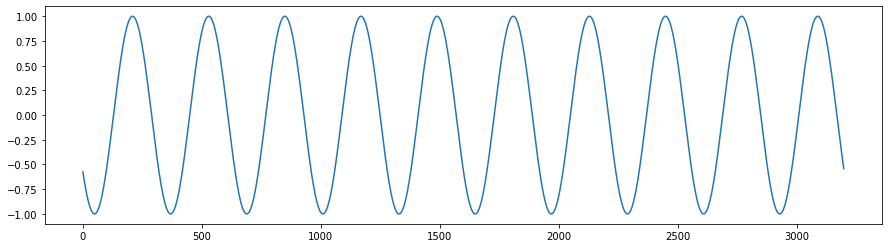

In [123]:
plt.rcParams["figure.figsize"] = (15,4)

# stuff = pqmodel.pqmodel_df(num_samples=30)

index = 1

print('Class:', full_df['class'][index])
plt.plot(list(full_df.iloc[index,3:]))

In [126]:
for i in range(20000000):
    print(f'potato{i}')

potato0
potato1
potato2
potato3
potato4
potato5
potato6
potato7
potato8
potato9
potato10
potato11
potato12
potato13
potato14
potato15
potato16
potato17
potato18
potato19
potato20
potato21
potato22
potato23
potato24
potato25
potato26
potato27
potato28
potato29
potato30
potato31
potato32
potato33
potato34
potato35
potato36
potato37
potato38
potato39
potato40
potato41
potato42
potato43
potato44
potato45
potato46
potato47
potato48
potato49
potato50
potato51
potato52
potato53
potato54
potato55
potato56
potato57
potato58
potato59
potato60
potato61
potato62
potato63
potato64
potato65
potato66
potato67
potato68
potato69
potato70
potato71
potato72
potato73
potato74
potato75
potato76
potato77
potato78
potato79
potato80
potato81
potato82
potato83
potato84
potato85
potato86
potato87
potato88
potato89
potato90
potato91
potato92
potato93
potato94
potato95
potato96
potato97
potato98
potato99
potato100
potato101
potato102
potato103
potato104
potato105
potato106
potato107
potato108
potato109
potato110


potato1661
potato1662
potato1663
potato1664
potato1665
potato1666
potato1667
potato1668
potato1669
potato1670
potato1671
potato1672
potato1673
potato1674
potato1675
potato1676
potato1677
potato1678
potato1679
potato1680
potato1681
potato1682
potato1683
potato1684
potato1685
potato1686
potato1687
potato1688
potato1689
potato1690
potato1691
potato1692
potato1693
potato1694
potato1695
potato1696
potato1697
potato1698
potato1699
potato1700
potato1701
potato1702
potato1703
potato1704
potato1705
potato1706
potato1707
potato1708
potato1709
potato1710
potato1711
potato1712
potato1713
potato1714
potato1715
potato1716
potato1717
potato1718
potato1719
potato1720
potato1721
potato1722
potato1723
potato1724
potato1725
potato1726
potato1727
potato1728
potato1729
potato1730
potato1731
potato1732
potato1733
potato1734
potato1735
potato1736
potato1737
potato1738
potato1739
potato1740
potato1741
potato1742
potato1743
potato1744
potato1745
potato1746
potato1747
potato1748
potato1749
potato1750
potato1751

potato2990
potato2991
potato2992
potato2993
potato2994
potato2995
potato2996
potato2997
potato2998
potato2999
potato3000
potato3001
potato3002
potato3003
potato3004
potato3005
potato3006
potato3007
potato3008
potato3009
potato3010
potato3011
potato3012
potato3013
potato3014
potato3015
potato3016
potato3017
potato3018
potato3019
potato3020
potato3021
potato3022
potato3023
potato3024
potato3025
potato3026
potato3027
potato3028
potato3029
potato3030
potato3031
potato3032
potato3033
potato3034
potato3035
potato3036
potato3037
potato3038
potato3039
potato3040
potato3041
potato3042
potato3043
potato3044
potato3045
potato3046
potato3047
potato3048
potato3049
potato3050
potato3051
potato3052
potato3053
potato3054
potato3055
potato3056
potato3057
potato3058
potato3059
potato3060
potato3061
potato3062
potato3063
potato3064
potato3065
potato3066
potato3067
potato3068
potato3069
potato3070
potato3071
potato3072
potato3073
potato3074
potato3075
potato3076
potato3077
potato3078
potato3079
potato3080

potato4489
potato4490
potato4491
potato4492
potato4493
potato4494
potato4495
potato4496
potato4497
potato4498
potato4499
potato4500
potato4501
potato4502
potato4503
potato4504
potato4505
potato4506
potato4507
potato4508
potato4509
potato4510
potato4511
potato4512
potato4513
potato4514
potato4515
potato4516
potato4517
potato4518
potato4519
potato4520
potato4521
potato4522
potato4523
potato4524
potato4525
potato4526
potato4527
potato4528
potato4529
potato4530
potato4531
potato4532
potato4533
potato4534
potato4535
potato4536
potato4537
potato4538
potato4539
potato4540
potato4541
potato4542
potato4543
potato4544
potato4545
potato4546
potato4547
potato4548
potato4549
potato4550
potato4551
potato4552
potato4553
potato4554
potato4555
potato4556
potato4557
potato4558
potato4559
potato4560
potato4561
potato4562
potato4563
potato4564
potato4565
potato4566
potato4567
potato4568
potato4569
potato4570
potato4571
potato4572
potato4573
potato4574
potato4575
potato4576
potato4577
potato4578
potato4579

potato5489
potato5490
potato5491
potato5492
potato5493
potato5494
potato5495
potato5496
potato5497
potato5498
potato5499
potato5500
potato5501
potato5502
potato5503
potato5504
potato5505
potato5506
potato5507
potato5508
potato5509
potato5510
potato5511
potato5512
potato5513
potato5514
potato5515
potato5516
potato5517
potato5518
potato5519
potato5520
potato5521
potato5522
potato5523
potato5524
potato5525
potato5526
potato5527
potato5528
potato5529
potato5530
potato5531
potato5532
potato5533
potato5534
potato5535
potato5536
potato5537
potato5538
potato5539
potato5540
potato5541
potato5542
potato5543
potato5544
potato5545
potato5546
potato5547
potato5548
potato5549
potato5550
potato5551
potato5552
potato5553
potato5554
potato5555
potato5556
potato5557
potato5558
potato5559
potato5560
potato5561
potato5562
potato5563
potato5564
potato5565
potato5566
potato5567
potato5568
potato5569
potato5570
potato5571
potato5572
potato5573
potato5574
potato5575
potato5576
potato5577
potato5578
potato5579

potato6988
potato6989
potato6990
potato6991
potato6992
potato6993
potato6994
potato6995
potato6996
potato6997
potato6998
potato6999
potato7000
potato7001
potato7002
potato7003
potato7004
potato7005
potato7006
potato7007
potato7008
potato7009
potato7010
potato7011
potato7012
potato7013
potato7014
potato7015
potato7016
potato7017
potato7018
potato7019
potato7020
potato7021
potato7022
potato7023
potato7024
potato7025
potato7026
potato7027
potato7028
potato7029
potato7030
potato7031
potato7032
potato7033
potato7034
potato7035
potato7036
potato7037
potato7038
potato7039
potato7040
potato7041
potato7042
potato7043
potato7044
potato7045
potato7046
potato7047
potato7048
potato7049
potato7050
potato7051
potato7052
potato7053
potato7054
potato7055
potato7056
potato7057
potato7058
potato7059
potato7060
potato7061
potato7062
potato7063
potato7064
potato7065
potato7066
potato7067
potato7068
potato7069
potato7070
potato7071
potato7072
potato7073
potato7074
potato7075
potato7076
potato7077
potato7078

potato8988
potato8989
potato8990
potato8991
potato8992
potato8993
potato8994
potato8995
potato8996
potato8997
potato8998
potato8999
potato9000
potato9001
potato9002
potato9003
potato9004
potato9005
potato9006
potato9007
potato9008
potato9009
potato9010
potato9011
potato9012
potato9013
potato9014
potato9015
potato9016
potato9017
potato9018
potato9019
potato9020
potato9021
potato9022
potato9023
potato9024
potato9025
potato9026
potato9027
potato9028
potato9029
potato9030
potato9031
potato9032
potato9033
potato9034
potato9035
potato9036
potato9037
potato9038
potato9039
potato9040
potato9041
potato9042
potato9043
potato9044
potato9045
potato9046
potato9047
potato9048
potato9049
potato9050
potato9051
potato9052
potato9053
potato9054
potato9055
potato9056
potato9057
potato9058
potato9059
potato9060
potato9061
potato9062
potato9063
potato9064
potato9065
potato9066
potato9067
potato9068
potato9069
potato9070
potato9071
potato9072
potato9073
potato9074
potato9075
potato9076
potato9077
potato9078

potato10623
potato10624
potato10625
potato10626
potato10627
potato10628
potato10629
potato10630
potato10631
potato10632
potato10633
potato10634
potato10635
potato10636
potato10637
potato10638
potato10639
potato10640
potato10641
potato10642
potato10643
potato10644
potato10645
potato10646
potato10647
potato10648
potato10649
potato10650
potato10651
potato10652
potato10653
potato10654
potato10655
potato10656
potato10657
potato10658
potato10659
potato10660
potato10661
potato10662
potato10663
potato10664
potato10665
potato10666
potato10667
potato10668
potato10669
potato10670
potato10671
potato10672
potato10673
potato10674
potato10675
potato10676
potato10677
potato10678
potato10679
potato10680
potato10681
potato10682
potato10683
potato10684
potato10685
potato10686
potato10687
potato10688
potato10689
potato10690
potato10691
potato10692
potato10693
potato10694
potato10695
potato10696
potato10697
potato10698
potato10699
potato10700
potato10701
potato10702
potato10703
potato10704
potato10705
pota

potato12487
potato12488
potato12489
potato12490
potato12491
potato12492
potato12493
potato12494
potato12495
potato12496
potato12497
potato12498
potato12499
potato12500
potato12501
potato12502
potato12503
potato12504
potato12505
potato12506
potato12507
potato12508
potato12509
potato12510
potato12511
potato12512
potato12513
potato12514
potato12515
potato12516
potato12517
potato12518
potato12519
potato12520
potato12521
potato12522
potato12523
potato12524
potato12525
potato12526
potato12527
potato12528
potato12529
potato12530
potato12531
potato12532
potato12533
potato12534
potato12535
potato12536
potato12537
potato12538
potato12539
potato12540
potato12541
potato12542
potato12543
potato12544
potato12545
potato12546
potato12547
potato12548
potato12549
potato12550
potato12551
potato12552
potato12553
potato12554
potato12555
potato12556
potato12557
potato12558
potato12559
potato12560
potato12561
potato12562
potato12563
potato12564
potato12565
potato12566
potato12567
potato12568
potato12569
pota

potato14417
potato14418
potato14419
potato14420
potato14421
potato14422
potato14423
potato14424
potato14425
potato14426
potato14427
potato14428
potato14429
potato14430
potato14431
potato14432
potato14433
potato14434
potato14435
potato14436
potato14437
potato14438
potato14439
potato14440
potato14441
potato14442
potato14443
potato14444
potato14445
potato14446
potato14447
potato14448
potato14449
potato14450
potato14451
potato14452
potato14453
potato14454
potato14455
potato14456
potato14457
potato14458
potato14459
potato14460
potato14461
potato14462
potato14463
potato14464
potato14465
potato14466
potato14467
potato14468
potato14469
potato14470
potato14471
potato14472
potato14473
potato14474
potato14475
potato14476
potato14477
potato14478
potato14479
potato14480
potato14481
potato14482
potato14483
potato14484
potato14485
potato14486
potato14487
potato14488
potato14489
potato14490
potato14491
potato14492
potato14493
potato14494
potato14495
potato14496
potato14497
potato14498
potato14499
pota

potato15986
potato15987
potato15988
potato15989
potato15990
potato15991
potato15992
potato15993
potato15994
potato15995
potato15996
potato15997
potato15998
potato15999
potato16000
potato16001
potato16002
potato16003
potato16004
potato16005
potato16006
potato16007
potato16008
potato16009
potato16010
potato16011
potato16012
potato16013
potato16014
potato16015
potato16016
potato16017
potato16018
potato16019
potato16020
potato16021
potato16022
potato16023
potato16024
potato16025
potato16026
potato16027
potato16028
potato16029
potato16030
potato16031
potato16032
potato16033
potato16034
potato16035
potato16036
potato16037
potato16038
potato16039
potato16040
potato16041
potato16042
potato16043
potato16044
potato16045
potato16046
potato16047
potato16048
potato16049
potato16050
potato16051
potato16052
potato16053
potato16054
potato16055
potato16056
potato16057
potato16058
potato16059
potato16060
potato16061
potato16062
potato16063
potato16064
potato16065
potato16066
potato16067
potato16068
pota

potato17985
potato17986
potato17987
potato17988
potato17989
potato17990
potato17991
potato17992
potato17993
potato17994
potato17995
potato17996
potato17997
potato17998
potato17999
potato18000
potato18001
potato18002
potato18003
potato18004
potato18005
potato18006
potato18007
potato18008
potato18009
potato18010
potato18011
potato18012
potato18013
potato18014
potato18015
potato18016
potato18017
potato18018
potato18019
potato18020
potato18021
potato18022
potato18023
potato18024
potato18025
potato18026
potato18027
potato18028
potato18029
potato18030
potato18031
potato18032
potato18033
potato18034
potato18035
potato18036
potato18037
potato18038
potato18039
potato18040
potato18041
potato18042
potato18043
potato18044
potato18045
potato18046
potato18047
potato18048
potato18049
potato18050
potato18051
potato18052
potato18053
potato18054
potato18055
potato18056
potato18057
potato18058
potato18059
potato18060
potato18061
potato18062
potato18063
potato18064
potato18065
potato18066
potato18067
pota

potato19985
potato19986
potato19987
potato19988
potato19989
potato19990
potato19991
potato19992
potato19993
potato19994
potato19995
potato19996
potato19997
potato19998
potato19999
potato20000
potato20001
potato20002
potato20003
potato20004
potato20005
potato20006
potato20007
potato20008
potato20009
potato20010
potato20011
potato20012
potato20013
potato20014
potato20015
potato20016
potato20017
potato20018
potato20019
potato20020
potato20021
potato20022
potato20023
potato20024
potato20025
potato20026
potato20027
potato20028
potato20029
potato20030
potato20031
potato20032
potato20033
potato20034
potato20035
potato20036
potato20037
potato20038
potato20039
potato20040
potato20041
potato20042
potato20043
potato20044
potato20045
potato20046
potato20047
potato20048
potato20049
potato20050
potato20051
potato20052
potato20053
potato20054
potato20055
potato20056
potato20057
potato20058
potato20059
potato20060
potato20061
potato20062
potato20063
potato20064
potato20065
potato20066
potato20067
pota

potato21884
potato21885
potato21886
potato21887
potato21888
potato21889
potato21890
potato21891
potato21892
potato21893
potato21894
potato21895
potato21896
potato21897
potato21898
potato21899
potato21900
potato21901
potato21902
potato21903
potato21904
potato21905
potato21906
potato21907
potato21908
potato21909
potato21910
potato21911
potato21912
potato21913
potato21914
potato21915
potato21916
potato21917
potato21918
potato21919
potato21920
potato21921
potato21922
potato21923
potato21924
potato21925
potato21926
potato21927
potato21928
potato21929
potato21930
potato21931
potato21932
potato21933
potato21934
potato21935
potato21936
potato21937
potato21938
potato21939
potato21940
potato21941
potato21942
potato21943
potato21944
potato21945
potato21946
potato21947
potato21948
potato21949
potato21950
potato21951
potato21952
potato21953
potato21954
potato21955
potato21956
potato21957
potato21958
potato21959
potato21960
potato21961
potato21962
potato21963
potato21964
potato21965
potato21966
pota

potato22984
potato22985
potato22986
potato22987
potato22988
potato22989
potato22990
potato22991
potato22992
potato22993
potato22994
potato22995
potato22996
potato22997
potato22998
potato22999
potato23000
potato23001
potato23002
potato23003
potato23004
potato23005
potato23006
potato23007
potato23008
potato23009
potato23010
potato23011
potato23012
potato23013
potato23014
potato23015
potato23016
potato23017
potato23018
potato23019
potato23020
potato23021
potato23022
potato23023
potato23024
potato23025
potato23026
potato23027
potato23028
potato23029
potato23030
potato23031
potato23032
potato23033
potato23034
potato23035
potato23036
potato23037
potato23038
potato23039
potato23040
potato23041
potato23042
potato23043
potato23044
potato23045
potato23046
potato23047
potato23048
potato23049
potato23050
potato23051
potato23052
potato23053
potato23054
potato23055
potato23056
potato23057
potato23058
potato23059
potato23060
potato23061
potato23062
potato23063
potato23064
potato23065
potato23066
pota

potato23983
potato23984
potato23985
potato23986
potato23987
potato23988
potato23989
potato23990
potato23991
potato23992
potato23993
potato23994
potato23995
potato23996
potato23997
potato23998
potato23999
potato24000
potato24001
potato24002
potato24003
potato24004
potato24005
potato24006
potato24007
potato24008
potato24009
potato24010
potato24011
potato24012
potato24013
potato24014
potato24015
potato24016
potato24017
potato24018
potato24019
potato24020
potato24021
potato24022
potato24023
potato24024
potato24025
potato24026
potato24027
potato24028
potato24029
potato24030
potato24031
potato24032
potato24033
potato24034
potato24035
potato24036
potato24037
potato24038
potato24039
potato24040
potato24041
potato24042
potato24043
potato24044
potato24045
potato24046
potato24047
potato24048
potato24049
potato24050
potato24051
potato24052
potato24053
potato24054
potato24055
potato24056
potato24057
potato24058
potato24059
potato24060
potato24061
potato24062
potato24063
potato24064
potato24065
pota

potato25757
potato25758
potato25759
potato25760
potato25761
potato25762
potato25763
potato25764
potato25765
potato25766
potato25767
potato25768
potato25769
potato25770
potato25771
potato25772
potato25773
potato25774
potato25775
potato25776
potato25777
potato25778
potato25779
potato25780
potato25781
potato25782
potato25783
potato25784
potato25785
potato25786
potato25787
potato25788
potato25789
potato25790
potato25791
potato25792
potato25793
potato25794
potato25795
potato25796
potato25797
potato25798
potato25799
potato25800
potato25801
potato25802
potato25803
potato25804
potato25805
potato25806
potato25807
potato25808
potato25809
potato25810
potato25811
potato25812
potato25813
potato25814
potato25815
potato25816
potato25817
potato25818
potato25819
potato25820
potato25821
potato25822
potato25823
potato25824
potato25825
potato25826
potato25827
potato25828
potato25829
potato25830
potato25831
potato25832
potato25833
potato25834
potato25835
potato25836
potato25837
potato25838
potato25839
pota

potato27303
potato27304
potato27305
potato27306
potato27307
potato27308
potato27309
potato27310
potato27311
potato27312
potato27313
potato27314
potato27315
potato27316
potato27317
potato27318
potato27319
potato27320
potato27321
potato27322
potato27323
potato27324
potato27325
potato27326
potato27327
potato27328
potato27329
potato27330
potato27331
potato27332
potato27333
potato27334
potato27335
potato27336
potato27337
potato27338
potato27339
potato27340
potato27341
potato27342
potato27343
potato27344
potato27345
potato27346
potato27347
potato27348
potato27349
potato27350
potato27351
potato27352
potato27353
potato27354
potato27355
potato27356
potato27357
potato27358
potato27359
potato27360
potato27361
potato27362
potato27363
potato27364
potato27365
potato27366
potato27367
potato27368
potato27369
potato27370
potato27371
potato27372
potato27373
potato27374
potato27375
potato27376
potato27377
potato27378
potato27379
potato27380
potato27381
potato27382
potato27383
potato27384
potato27385
pota

potato28982
potato28983
potato28984
potato28985
potato28986
potato28987
potato28988
potato28989
potato28990
potato28991
potato28992
potato28993
potato28994
potato28995
potato28996
potato28997
potato28998
potato28999
potato29000
potato29001
potato29002
potato29003
potato29004
potato29005
potato29006
potato29007
potato29008
potato29009
potato29010
potato29011
potato29012
potato29013
potato29014
potato29015
potato29016
potato29017
potato29018
potato29019
potato29020
potato29021
potato29022
potato29023
potato29024
potato29025
potato29026
potato29027
potato29028
potato29029
potato29030
potato29031
potato29032
potato29033
potato29034
potato29035
potato29036
potato29037
potato29038
potato29039
potato29040
potato29041
potato29042
potato29043
potato29044
potato29045
potato29046
potato29047
potato29048
potato29049
potato29050
potato29051
potato29052
potato29053
potato29054
potato29055
potato29056
potato29057
potato29058
potato29059
potato29060
potato29061
potato29062
potato29063
potato29064
pota

potato30629
potato30630
potato30631
potato30632
potato30633
potato30634
potato30635
potato30636
potato30637
potato30638
potato30639
potato30640
potato30641
potato30642
potato30643
potato30644
potato30645
potato30646
potato30647
potato30648
potato30649
potato30650
potato30651
potato30652
potato30653
potato30654
potato30655
potato30656
potato30657
potato30658
potato30659
potato30660
potato30661
potato30662
potato30663
potato30664
potato30665
potato30666
potato30667
potato30668
potato30669
potato30670
potato30671
potato30672
potato30673
potato30674
potato30675
potato30676
potato30677
potato30678
potato30679
potato30680
potato30681
potato30682
potato30683
potato30684
potato30685
potato30686
potato30687
potato30688
potato30689
potato30690
potato30691
potato30692
potato30693
potato30694
potato30695
potato30696
potato30697
potato30698
potato30699
potato30700
potato30701
potato30702
potato30703
potato30704
potato30705
potato30706
potato30707
potato30708
potato30709
potato30710
potato30711
pota

potato32325
potato32326
potato32327
potato32328
potato32329
potato32330
potato32331
potato32332
potato32333
potato32334
potato32335
potato32336
potato32337
potato32338
potato32339
potato32340
potato32341
potato32342
potato32343
potato32344
potato32345
potato32346
potato32347
potato32348
potato32349
potato32350
potato32351
potato32352
potato32353
potato32354
potato32355
potato32356
potato32357
potato32358
potato32359
potato32360
potato32361
potato32362
potato32363
potato32364
potato32365
potato32366
potato32367
potato32368
potato32369
potato32370
potato32371
potato32372
potato32373
potato32374
potato32375
potato32376
potato32377
potato32378
potato32379
potato32380
potato32381
potato32382
potato32383
potato32384
potato32385
potato32386
potato32387
potato32388
potato32389
potato32390
potato32391
potato32392
potato32393
potato32394
potato32395
potato32396
potato32397
potato32398
potato32399
potato32400
potato32401
potato32402
potato32403
potato32404
potato32405
potato32406
potato32407
pota

potato33981
potato33982
potato33983
potato33984
potato33985
potato33986
potato33987
potato33988
potato33989
potato33990
potato33991
potato33992
potato33993
potato33994
potato33995
potato33996
potato33997
potato33998
potato33999
potato34000
potato34001
potato34002
potato34003
potato34004
potato34005
potato34006
potato34007
potato34008
potato34009
potato34010
potato34011
potato34012
potato34013
potato34014
potato34015
potato34016
potato34017
potato34018
potato34019
potato34020
potato34021
potato34022
potato34023
potato34024
potato34025
potato34026
potato34027
potato34028
potato34029
potato34030
potato34031
potato34032
potato34033
potato34034
potato34035
potato34036
potato34037
potato34038
potato34039
potato34040
potato34041
potato34042
potato34043
potato34044
potato34045
potato34046
potato34047
potato34048
potato34049
potato34050
potato34051
potato34052
potato34053
potato34054
potato34055
potato34056
potato34057
potato34058
potato34059
potato34060
potato34061
potato34062
potato34063
pota

potato35480
potato35481
potato35482
potato35483
potato35484
potato35485
potato35486
potato35487
potato35488
potato35489
potato35490
potato35491
potato35492
potato35493
potato35494
potato35495
potato35496
potato35497
potato35498
potato35499
potato35500
potato35501
potato35502
potato35503
potato35504
potato35505
potato35506
potato35507
potato35508
potato35509
potato35510
potato35511
potato35512
potato35513
potato35514
potato35515
potato35516
potato35517
potato35518
potato35519
potato35520
potato35521
potato35522
potato35523
potato35524
potato35525
potato35526
potato35527
potato35528
potato35529
potato35530
potato35531
potato35532
potato35533
potato35534
potato35535
potato35536
potato35537
potato35538
potato35539
potato35540
potato35541
potato35542
potato35543
potato35544
potato35545
potato35546
potato35547
potato35548
potato35549
potato35550
potato35551
potato35552
potato35553
potato35554
potato35555
potato35556
potato35557
potato35558
potato35559
potato35560
potato35561
potato35562
pota

potato36979
potato36980
potato36981
potato36982
potato36983
potato36984
potato36985
potato36986
potato36987
potato36988
potato36989
potato36990
potato36991
potato36992
potato36993
potato36994
potato36995
potato36996
potato36997
potato36998
potato36999
potato37000
potato37001
potato37002
potato37003
potato37004
potato37005
potato37006
potato37007
potato37008
potato37009
potato37010
potato37011
potato37012
potato37013
potato37014
potato37015
potato37016
potato37017
potato37018
potato37019
potato37020
potato37021
potato37022
potato37023
potato37024
potato37025
potato37026
potato37027
potato37028
potato37029
potato37030
potato37031
potato37032
potato37033
potato37034
potato37035
potato37036
potato37037
potato37038
potato37039
potato37040
potato37041
potato37042
potato37043
potato37044
potato37045
potato37046
potato37047
potato37048
potato37049
potato37050
potato37051
potato37052
potato37053
potato37054
potato37055
potato37056
potato37057
potato37058
potato37059
potato37060
potato37061
pota

potato38656
potato38657
potato38658
potato38659
potato38660
potato38661
potato38662
potato38663
potato38664
potato38665
potato38666
potato38667
potato38668
potato38669
potato38670
potato38671
potato38672
potato38673
potato38674
potato38675
potato38676
potato38677
potato38678
potato38679
potato38680
potato38681
potato38682
potato38683
potato38684
potato38685
potato38686
potato38687
potato38688
potato38689
potato38690
potato38691
potato38692
potato38693
potato38694
potato38695
potato38696
potato38697
potato38698
potato38699
potato38700
potato38701
potato38702
potato38703
potato38704
potato38705
potato38706
potato38707
potato38708
potato38709
potato38710
potato38711
potato38712
potato38713
potato38714
potato38715
potato38716
potato38717
potato38718
potato38719
potato38720
potato38721
potato38722
potato38723
potato38724
potato38725
potato38726
potato38727
potato38728
potato38729
potato38730
potato38731
potato38732
potato38733
potato38734
potato38735
potato38736
potato38737
potato38738
pota

potato39702
potato39703
potato39704
potato39705
potato39706
potato39707
potato39708
potato39709
potato39710
potato39711
potato39712
potato39713
potato39714
potato39715
potato39716
potato39717
potato39718
potato39719
potato39720
potato39721
potato39722
potato39723
potato39724
potato39725
potato39726
potato39727
potato39728
potato39729
potato39730
potato39731
potato39732
potato39733
potato39734
potato39735
potato39736
potato39737
potato39738
potato39739
potato39740
potato39741
potato39742
potato39743
potato39744
potato39745
potato39746
potato39747
potato39748
potato39749
potato39750
potato39751
potato39752
potato39753
potato39754
potato39755
potato39756
potato39757
potato39758
potato39759
potato39760
potato39761
potato39762
potato39763
potato39764
potato39765
potato39766
potato39767
potato39768
potato39769
potato39770
potato39771
potato39772
potato39773
potato39774
potato39775
potato39776
potato39777
potato39778
potato39779
potato39780
potato39781
potato39782
potato39783
potato39784
pota

potato41238
potato41239
potato41240
potato41241
potato41242
potato41243
potato41244
potato41245
potato41246
potato41247
potato41248
potato41249
potato41250
potato41251
potato41252
potato41253
potato41254
potato41255
potato41256
potato41257
potato41258
potato41259
potato41260
potato41261
potato41262
potato41263
potato41264
potato41265
potato41266
potato41267
potato41268
potato41269
potato41270
potato41271
potato41272
potato41273
potato41274
potato41275
potato41276
potato41277
potato41278
potato41279
potato41280
potato41281
potato41282
potato41283
potato41284
potato41285
potato41286
potato41287
potato41288
potato41289
potato41290
potato41291
potato41292
potato41293
potato41294
potato41295
potato41296
potato41297
potato41298
potato41299
potato41300
potato41301
potato41302
potato41303
potato41304
potato41305
potato41306
potato41307
potato41308
potato41309
potato41310
potato41311
potato41312
potato41313
potato41314
potato41315
potato41316
potato41317
potato41318
potato41319
potato41320
pota

potato42619
potato42620
potato42621
potato42622
potato42623
potato42624
potato42625
potato42626
potato42627
potato42628
potato42629
potato42630
potato42631
potato42632
potato42633
potato42634
potato42635
potato42636
potato42637
potato42638
potato42639
potato42640
potato42641
potato42642
potato42643
potato42644
potato42645
potato42646
potato42647
potato42648
potato42649
potato42650
potato42651
potato42652
potato42653
potato42654
potato42655
potato42656
potato42657
potato42658
potato42659
potato42660
potato42661
potato42662
potato42663
potato42664
potato42665
potato42666
potato42667
potato42668
potato42669
potato42670
potato42671
potato42672
potato42673
potato42674
potato42675
potato42676
potato42677
potato42678
potato42679
potato42680
potato42681
potato42682
potato42683
potato42684
potato42685
potato42686
potato42687
potato42688
potato42689
potato42690
potato42691
potato42692
potato42693
potato42694
potato42695
potato42696
potato42697
potato42698
potato42699
potato42700
potato42701
pota

potato44213
potato44214
potato44215
potato44216
potato44217
potato44218
potato44219
potato44220
potato44221
potato44222
potato44223
potato44224
potato44225
potato44226
potato44227
potato44228
potato44229
potato44230
potato44231
potato44232
potato44233
potato44234
potato44235
potato44236
potato44237
potato44238
potato44239
potato44240
potato44241
potato44242
potato44243
potato44244
potato44245
potato44246
potato44247
potato44248
potato44249
potato44250
potato44251
potato44252
potato44253
potato44254
potato44255
potato44256
potato44257
potato44258
potato44259
potato44260
potato44261
potato44262
potato44263
potato44264
potato44265
potato44266
potato44267
potato44268
potato44269
potato44270
potato44271
potato44272
potato44273
potato44274
potato44275
potato44276
potato44277
potato44278
potato44279
potato44280
potato44281
potato44282
potato44283
potato44284
potato44285
potato44286
potato44287
potato44288
potato44289
potato44290
potato44291
potato44292
potato44293
potato44294
potato44295
pota

potato45587
potato45588
potato45589
potato45590
potato45591
potato45592
potato45593
potato45594
potato45595
potato45596
potato45597
potato45598
potato45599
potato45600
potato45601
potato45602
potato45603
potato45604
potato45605
potato45606
potato45607
potato45608
potato45609
potato45610
potato45611
potato45612
potato45613
potato45614
potato45615
potato45616
potato45617
potato45618
potato45619
potato45620
potato45621
potato45622
potato45623
potato45624
potato45625
potato45626
potato45627
potato45628
potato45629
potato45630
potato45631
potato45632
potato45633
potato45634
potato45635
potato45636
potato45637
potato45638
potato45639
potato45640
potato45641
potato45642
potato45643
potato45644
potato45645
potato45646
potato45647
potato45648
potato45649
potato45650
potato45651
potato45652
potato45653
potato45654
potato45655
potato45656
potato45657
potato45658
potato45659
potato45660
potato45661
potato45662
potato45663
potato45664
potato45665
potato45666
potato45667
potato45668
potato45669
pota

potato47130
potato47131
potato47132
potato47133
potato47134
potato47135
potato47136
potato47137
potato47138
potato47139
potato47140
potato47141
potato47142
potato47143
potato47144
potato47145
potato47146
potato47147
potato47148
potato47149
potato47150
potato47151
potato47152
potato47153
potato47154
potato47155
potato47156
potato47157
potato47158
potato47159
potato47160
potato47161
potato47162
potato47163
potato47164
potato47165
potato47166
potato47167
potato47168
potato47169
potato47170
potato47171
potato47172
potato47173
potato47174
potato47175
potato47176
potato47177
potato47178
potato47179
potato47180
potato47181
potato47182
potato47183
potato47184
potato47185
potato47186
potato47187
potato47188
potato47189
potato47190
potato47191
potato47192
potato47193
potato47194
potato47195
potato47196
potato47197
potato47198
potato47199
potato47200
potato47201
potato47202
potato47203
potato47204
potato47205
potato47206
potato47207
potato47208
potato47209
potato47210
potato47211
potato47212
pota

potato48753
potato48754
potato48755
potato48756
potato48757
potato48758
potato48759
potato48760
potato48761
potato48762
potato48763
potato48764
potato48765
potato48766
potato48767
potato48768
potato48769
potato48770
potato48771
potato48772
potato48773
potato48774
potato48775
potato48776
potato48777
potato48778
potato48779
potato48780
potato48781
potato48782
potato48783
potato48784
potato48785
potato48786
potato48787
potato48788
potato48789
potato48790
potato48791
potato48792
potato48793
potato48794
potato48795
potato48796
potato48797
potato48798
potato48799
potato48800
potato48801
potato48802
potato48803
potato48804
potato48805
potato48806
potato48807
potato48808
potato48809
potato48810
potato48811
potato48812
potato48813
potato48814
potato48815
potato48816
potato48817
potato48818
potato48819
potato48820
potato48821
potato48822
potato48823
potato48824
potato48825
potato48826
potato48827
potato48828
potato48829
potato48830
potato48831
potato48832
potato48833
potato48834
potato48835
pota

potato50149
potato50150
potato50151
potato50152
potato50153
potato50154
potato50155
potato50156
potato50157
potato50158
potato50159
potato50160
potato50161
potato50162
potato50163
potato50164
potato50165
potato50166
potato50167
potato50168
potato50169
potato50170
potato50171
potato50172
potato50173
potato50174
potato50175
potato50176
potato50177
potato50178
potato50179
potato50180
potato50181
potato50182
potato50183
potato50184
potato50185
potato50186
potato50187
potato50188
potato50189
potato50190
potato50191
potato50192
potato50193
potato50194
potato50195
potato50196
potato50197
potato50198
potato50199
potato50200
potato50201
potato50202
potato50203
potato50204
potato50205
potato50206
potato50207
potato50208
potato50209
potato50210
potato50211
potato50212
potato50213
potato50214
potato50215
potato50216
potato50217
potato50218
potato50219
potato50220
potato50221
potato50222
potato50223
potato50224
potato50225
potato50226
potato50227
potato50228
potato50229
potato50230
potato50231
pota

potato51481
potato51482
potato51483
potato51484
potato51485
potato51486
potato51487
potato51488
potato51489
potato51490
potato51491
potato51492
potato51493
potato51494
potato51495
potato51496
potato51497
potato51498
potato51499
potato51500
potato51501
potato51502
potato51503
potato51504
potato51505
potato51506
potato51507
potato51508
potato51509
potato51510
potato51511
potato51512
potato51513
potato51514
potato51515
potato51516
potato51517
potato51518
potato51519
potato51520
potato51521
potato51522
potato51523
potato51524
potato51525
potato51526
potato51527
potato51528
potato51529
potato51530
potato51531
potato51532
potato51533
potato51534
potato51535
potato51536
potato51537
potato51538
potato51539
potato51540
potato51541
potato51542
potato51543
potato51544
potato51545
potato51546
potato51547
potato51548
potato51549
potato51550
potato51551
potato51552
potato51553
potato51554
potato51555
potato51556
potato51557
potato51558
potato51559
potato51560
potato51561
potato51562
potato51563
pota

potato52832
potato52833
potato52834
potato52835
potato52836
potato52837
potato52838
potato52839
potato52840
potato52841
potato52842
potato52843
potato52844
potato52845
potato52846
potato52847
potato52848
potato52849
potato52850
potato52851
potato52852
potato52853
potato52854
potato52855
potato52856
potato52857
potato52858
potato52859
potato52860
potato52861
potato52862
potato52863
potato52864
potato52865
potato52866
potato52867
potato52868
potato52869
potato52870
potato52871
potato52872
potato52873
potato52874
potato52875
potato52876
potato52877
potato52878
potato52879
potato52880
potato52881
potato52882
potato52883
potato52884
potato52885
potato52886
potato52887
potato52888
potato52889
potato52890
potato52891
potato52892
potato52893
potato52894
potato52895
potato52896
potato52897
potato52898
potato52899
potato52900
potato52901
potato52902
potato52903
potato52904
potato52905
potato52906
potato52907
potato52908
potato52909
potato52910
potato52911
potato52912
potato52913
potato52914
pota

potato54338
potato54339
potato54340
potato54341
potato54342
potato54343
potato54344
potato54345
potato54346
potato54347
potato54348
potato54349
potato54350
potato54351
potato54352
potato54353
potato54354
potato54355
potato54356
potato54357
potato54358
potato54359
potato54360
potato54361
potato54362
potato54363
potato54364
potato54365
potato54366
potato54367
potato54368
potato54369
potato54370
potato54371
potato54372
potato54373
potato54374
potato54375
potato54376
potato54377
potato54378
potato54379
potato54380
potato54381
potato54382
potato54383
potato54384
potato54385
potato54386
potato54387
potato54388
potato54389
potato54390
potato54391
potato54392
potato54393
potato54394
potato54395
potato54396
potato54397
potato54398
potato54399
potato54400
potato54401
potato54402
potato54403
potato54404
potato54405
potato54406
potato54407
potato54408
potato54409
potato54410
potato54411
potato54412
potato54413
potato54414
potato54415
potato54416
potato54417
potato54418
potato54419
potato54420
pota

potato56141
potato56142
potato56143
potato56144
potato56145
potato56146
potato56147
potato56148
potato56149
potato56150
potato56151
potato56152
potato56153
potato56154
potato56155
potato56156
potato56157
potato56158
potato56159
potato56160
potato56161
potato56162
potato56163
potato56164
potato56165
potato56166
potato56167
potato56168
potato56169
potato56170
potato56171
potato56172
potato56173
potato56174
potato56175
potato56176
potato56177
potato56178
potato56179
potato56180
potato56181
potato56182
potato56183
potato56184
potato56185
potato56186
potato56187
potato56188
potato56189
potato56190
potato56191
potato56192
potato56193
potato56194
potato56195
potato56196
potato56197
potato56198
potato56199
potato56200
potato56201
potato56202
potato56203
potato56204
potato56205
potato56206
potato56207
potato56208
potato56209
potato56210
potato56211
potato56212
potato56213
potato56214
potato56215
potato56216
potato56217
potato56218
potato56219
potato56220
potato56221
potato56222
potato56223
pota

potato57472
potato57473
potato57474
potato57475
potato57476
potato57477
potato57478
potato57479
potato57480
potato57481
potato57482
potato57483
potato57484
potato57485
potato57486
potato57487
potato57488
potato57489
potato57490
potato57491
potato57492
potato57493
potato57494
potato57495
potato57496
potato57497
potato57498
potato57499
potato57500
potato57501
potato57502
potato57503
potato57504
potato57505
potato57506
potato57507
potato57508
potato57509
potato57510
potato57511
potato57512
potato57513
potato57514
potato57515
potato57516
potato57517
potato57518
potato57519
potato57520
potato57521
potato57522
potato57523
potato57524
potato57525
potato57526
potato57527
potato57528
potato57529
potato57530
potato57531
potato57532
potato57533
potato57534
potato57535
potato57536
potato57537
potato57538
potato57539
potato57540
potato57541
potato57542
potato57543
potato57544
potato57545
potato57546
potato57547
potato57548
potato57549
potato57550
potato57551
potato57552
potato57553
potato57554
pota

potato58972
potato58973
potato58974
potato58975
potato58976
potato58977
potato58978
potato58979
potato58980
potato58981
potato58982
potato58983
potato58984
potato58985
potato58986
potato58987
potato58988
potato58989
potato58990
potato58991
potato58992
potato58993
potato58994
potato58995
potato58996
potato58997
potato58998
potato58999
potato59000
potato59001
potato59002
potato59003
potato59004
potato59005
potato59006
potato59007
potato59008
potato59009
potato59010
potato59011
potato59012
potato59013
potato59014
potato59015
potato59016
potato59017
potato59018
potato59019
potato59020
potato59021
potato59022
potato59023
potato59024
potato59025
potato59026
potato59027
potato59028
potato59029
potato59030
potato59031
potato59032
potato59033
potato59034
potato59035
potato59036
potato59037
potato59038
potato59039
potato59040
potato59041
potato59042
potato59043
potato59044
potato59045
potato59046
potato59047
potato59048
potato59049
potato59050
potato59051
potato59052
potato59053
potato59054
pota

potato60471
potato60472
potato60473
potato60474
potato60475
potato60476
potato60477
potato60478
potato60479
potato60480
potato60481
potato60482
potato60483
potato60484
potato60485
potato60486
potato60487
potato60488
potato60489
potato60490
potato60491
potato60492
potato60493
potato60494
potato60495
potato60496
potato60497
potato60498
potato60499
potato60500
potato60501
potato60502
potato60503
potato60504
potato60505
potato60506
potato60507
potato60508
potato60509
potato60510
potato60511
potato60512
potato60513
potato60514
potato60515
potato60516
potato60517
potato60518
potato60519
potato60520
potato60521
potato60522
potato60523
potato60524
potato60525
potato60526
potato60527
potato60528
potato60529
potato60530
potato60531
potato60532
potato60533
potato60534
potato60535
potato60536
potato60537
potato60538
potato60539
potato60540
potato60541
potato60542
potato60543
potato60544
potato60545
potato60546
potato60547
potato60548
potato60549
potato60550
potato60551
potato60552
potato60553
pota

potato61971
potato61972
potato61973
potato61974
potato61975
potato61976
potato61977
potato61978
potato61979
potato61980
potato61981
potato61982
potato61983
potato61984
potato61985
potato61986
potato61987
potato61988
potato61989
potato61990
potato61991
potato61992
potato61993
potato61994
potato61995
potato61996
potato61997
potato61998
potato61999
potato62000
potato62001
potato62002
potato62003
potato62004
potato62005
potato62006
potato62007
potato62008
potato62009
potato62010
potato62011
potato62012
potato62013
potato62014
potato62015
potato62016
potato62017
potato62018
potato62019
potato62020
potato62021
potato62022
potato62023
potato62024
potato62025
potato62026
potato62027
potato62028
potato62029
potato62030
potato62031
potato62032
potato62033
potato62034
potato62035
potato62036
potato62037
potato62038
potato62039
potato62040
potato62041
potato62042
potato62043
potato62044
potato62045
potato62046
potato62047
potato62048
potato62049
potato62050
potato62051
potato62052
potato62053
pota

potato63470
potato63471
potato63472
potato63473
potato63474
potato63475
potato63476
potato63477
potato63478
potato63479
potato63480
potato63481
potato63482
potato63483
potato63484
potato63485
potato63486
potato63487
potato63488
potato63489
potato63490
potato63491
potato63492
potato63493
potato63494
potato63495
potato63496
potato63497
potato63498
potato63499
potato63500
potato63501
potato63502
potato63503
potato63504
potato63505
potato63506
potato63507
potato63508
potato63509
potato63510
potato63511
potato63512
potato63513
potato63514
potato63515
potato63516
potato63517
potato63518
potato63519
potato63520
potato63521
potato63522
potato63523
potato63524
potato63525
potato63526
potato63527
potato63528
potato63529
potato63530
potato63531
potato63532
potato63533
potato63534
potato63535
potato63536
potato63537
potato63538
potato63539
potato63540
potato63541
potato63542
potato63543
potato63544
potato63545
potato63546
potato63547
potato63548
potato63549
potato63550
potato63551
potato63552
pota

potato64970
potato64971
potato64972
potato64973
potato64974
potato64975
potato64976
potato64977
potato64978
potato64979
potato64980
potato64981
potato64982
potato64983
potato64984
potato64985
potato64986
potato64987
potato64988
potato64989
potato64990
potato64991
potato64992
potato64993
potato64994
potato64995
potato64996
potato64997
potato64998
potato64999
potato65000
potato65001
potato65002
potato65003
potato65004
potato65005
potato65006
potato65007
potato65008
potato65009
potato65010
potato65011
potato65012
potato65013
potato65014
potato65015
potato65016
potato65017
potato65018
potato65019
potato65020
potato65021
potato65022
potato65023
potato65024
potato65025
potato65026
potato65027
potato65028
potato65029
potato65030
potato65031
potato65032
potato65033
potato65034
potato65035
potato65036
potato65037
potato65038
potato65039
potato65040
potato65041
potato65042
potato65043
potato65044
potato65045
potato65046
potato65047
potato65048
potato65049
potato65050
potato65051
potato65052
pota

potato66469
potato66470
potato66471
potato66472
potato66473
potato66474
potato66475
potato66476
potato66477
potato66478
potato66479
potato66480
potato66481
potato66482
potato66483
potato66484
potato66485
potato66486
potato66487
potato66488
potato66489
potato66490
potato66491
potato66492
potato66493
potato66494
potato66495
potato66496
potato66497
potato66498
potato66499
potato66500
potato66501
potato66502
potato66503
potato66504
potato66505
potato66506
potato66507
potato66508
potato66509
potato66510
potato66511
potato66512
potato66513
potato66514
potato66515
potato66516
potato66517
potato66518
potato66519
potato66520
potato66521
potato66522
potato66523
potato66524
potato66525
potato66526
potato66527
potato66528
potato66529
potato66530
potato66531
potato66532
potato66533
potato66534
potato66535
potato66536
potato66537
potato66538
potato66539
potato66540
potato66541
potato66542
potato66543
potato66544
potato66545
potato66546
potato66547
potato66548
potato66549
potato66550
potato66551
pota

potato67969
potato67970
potato67971
potato67972
potato67973
potato67974
potato67975
potato67976
potato67977
potato67978
potato67979
potato67980
potato67981
potato67982
potato67983
potato67984
potato67985
potato67986
potato67987
potato67988
potato67989
potato67990
potato67991
potato67992
potato67993
potato67994
potato67995
potato67996
potato67997
potato67998
potato67999
potato68000
potato68001
potato68002
potato68003
potato68004
potato68005
potato68006
potato68007
potato68008
potato68009
potato68010
potato68011
potato68012
potato68013
potato68014
potato68015
potato68016
potato68017
potato68018
potato68019
potato68020
potato68021
potato68022
potato68023
potato68024
potato68025
potato68026
potato68027
potato68028
potato68029
potato68030
potato68031
potato68032
potato68033
potato68034
potato68035
potato68036
potato68037
potato68038
potato68039
potato68040
potato68041
potato68042
potato68043
potato68044
potato68045
potato68046
potato68047
potato68048
potato68049
potato68050
potato68051
pota

potato69468
potato69469
potato69470
potato69471
potato69472
potato69473
potato69474
potato69475
potato69476
potato69477
potato69478
potato69479
potato69480
potato69481
potato69482
potato69483
potato69484
potato69485
potato69486
potato69487
potato69488
potato69489
potato69490
potato69491
potato69492
potato69493
potato69494
potato69495
potato69496
potato69497
potato69498
potato69499
potato69500
potato69501
potato69502
potato69503
potato69504
potato69505
potato69506
potato69507
potato69508
potato69509
potato69510
potato69511
potato69512
potato69513
potato69514
potato69515
potato69516
potato69517
potato69518
potato69519
potato69520
potato69521
potato69522
potato69523
potato69524
potato69525
potato69526
potato69527
potato69528
potato69529
potato69530
potato69531
potato69532
potato69533
potato69534
potato69535
potato69536
potato69537
potato69538
potato69539
potato69540
potato69541
potato69542
potato69543
potato69544
potato69545
potato69546
potato69547
potato69548
potato69549
potato69550
pota

potato70968
potato70969
potato70970
potato70971
potato70972
potato70973
potato70974
potato70975
potato70976
potato70977
potato70978
potato70979
potato70980
potato70981
potato70982
potato70983
potato70984
potato70985
potato70986
potato70987
potato70988
potato70989
potato70990
potato70991
potato70992
potato70993
potato70994
potato70995
potato70996
potato70997
potato70998
potato70999
potato71000
potato71001
potato71002
potato71003
potato71004
potato71005
potato71006
potato71007
potato71008
potato71009
potato71010
potato71011
potato71012
potato71013
potato71014
potato71015
potato71016
potato71017
potato71018
potato71019
potato71020
potato71021
potato71022
potato71023
potato71024
potato71025
potato71026
potato71027
potato71028
potato71029
potato71030
potato71031
potato71032
potato71033
potato71034
potato71035
potato71036
potato71037
potato71038
potato71039
potato71040
potato71041
potato71042
potato71043
potato71044
potato71045
potato71046
potato71047
potato71048
potato71049
potato71050
pota

potato72467
potato72468
potato72469
potato72470
potato72471
potato72472
potato72473
potato72474
potato72475
potato72476
potato72477
potato72478
potato72479
potato72480
potato72481
potato72482
potato72483
potato72484
potato72485
potato72486
potato72487
potato72488
potato72489
potato72490
potato72491
potato72492
potato72493
potato72494
potato72495
potato72496
potato72497
potato72498
potato72499
potato72500
potato72501
potato72502
potato72503
potato72504
potato72505
potato72506
potato72507
potato72508
potato72509
potato72510
potato72511
potato72512
potato72513
potato72514
potato72515
potato72516
potato72517
potato72518
potato72519
potato72520
potato72521
potato72522
potato72523
potato72524
potato72525
potato72526
potato72527
potato72528
potato72529
potato72530
potato72531
potato72532
potato72533
potato72534
potato72535
potato72536
potato72537
potato72538
potato72539
potato72540
potato72541
potato72542
potato72543
potato72544
potato72545
potato72546
potato72547
potato72548
potato72549
pota

potato73967
potato73968
potato73969
potato73970
potato73971
potato73972
potato73973
potato73974
potato73975
potato73976
potato73977
potato73978
potato73979
potato73980
potato73981
potato73982
potato73983
potato73984
potato73985
potato73986
potato73987
potato73988
potato73989
potato73990
potato73991
potato73992
potato73993
potato73994
potato73995
potato73996
potato73997
potato73998
potato73999
potato74000
potato74001
potato74002
potato74003
potato74004
potato74005
potato74006
potato74007
potato74008
potato74009
potato74010
potato74011
potato74012
potato74013
potato74014
potato74015
potato74016
potato74017
potato74018
potato74019
potato74020
potato74021
potato74022
potato74023
potato74024
potato74025
potato74026
potato74027
potato74028
potato74029
potato74030
potato74031
potato74032
potato74033
potato74034
potato74035
potato74036
potato74037
potato74038
potato74039
potato74040
potato74041
potato74042
potato74043
potato74044
potato74045
potato74046
potato74047
potato74048
potato74049
pota

potato75466
potato75467
potato75468
potato75469
potato75470
potato75471
potato75472
potato75473
potato75474
potato75475
potato75476
potato75477
potato75478
potato75479
potato75480
potato75481
potato75482
potato75483
potato75484
potato75485
potato75486
potato75487
potato75488
potato75489
potato75490
potato75491
potato75492
potato75493
potato75494
potato75495
potato75496
potato75497
potato75498
potato75499
potato75500
potato75501
potato75502
potato75503
potato75504
potato75505
potato75506
potato75507
potato75508
potato75509
potato75510
potato75511
potato75512
potato75513
potato75514
potato75515
potato75516
potato75517
potato75518
potato75519
potato75520
potato75521
potato75522
potato75523
potato75524
potato75525
potato75526
potato75527
potato75528
potato75529
potato75530
potato75531
potato75532
potato75533
potato75534
potato75535
potato75536
potato75537
potato75538
potato75539
potato75540
potato75541
potato75542
potato75543
potato75544
potato75545
potato75546
potato75547
potato75548
pota

potato76946
potato76947
potato76948
potato76949
potato76950
potato76951
potato76952
potato76953
potato76954
potato76955
potato76956
potato76957
potato76958
potato76959
potato76960
potato76961
potato76962
potato76963
potato76964
potato76965
potato76966
potato76967
potato76968
potato76969
potato76970
potato76971
potato76972
potato76973
potato76974
potato76975
potato76976
potato76977
potato76978
potato76979
potato76980
potato76981
potato76982
potato76983
potato76984
potato76985
potato76986
potato76987
potato76988
potato76989
potato76990
potato76991
potato76992
potato76993
potato76994
potato76995
potato76996
potato76997
potato76998
potato76999
potato77000
potato77001
potato77002
potato77003
potato77004
potato77005
potato77006
potato77007
potato77008
potato77009
potato77010
potato77011
potato77012
potato77013
potato77014
potato77015
potato77016
potato77017
potato77018
potato77019
potato77020
potato77021
potato77022
potato77023
potato77024
potato77025
potato77026
potato77027
potato77028
pota

potato78434
potato78435
potato78436
potato78437
potato78438
potato78439
potato78440
potato78441
potato78442
potato78443
potato78444
potato78445
potato78446
potato78447
potato78448
potato78449
potato78450
potato78451
potato78452
potato78453
potato78454
potato78455
potato78456
potato78457
potato78458
potato78459
potato78460
potato78461
potato78462
potato78463
potato78464
potato78465
potato78466
potato78467
potato78468
potato78469
potato78470
potato78471
potato78472
potato78473
potato78474
potato78475
potato78476
potato78477
potato78478
potato78479
potato78480
potato78481
potato78482
potato78483
potato78484
potato78485
potato78486
potato78487
potato78488
potato78489
potato78490
potato78491
potato78492
potato78493
potato78494
potato78495
potato78496
potato78497
potato78498
potato78499
potato78500
potato78501
potato78502
potato78503
potato78504
potato78505
potato78506
potato78507
potato78508
potato78509
potato78510
potato78511
potato78512
potato78513
potato78514
potato78515
potato78516
pota

potato79765
potato79766
potato79767
potato79768
potato79769
potato79770
potato79771
potato79772
potato79773
potato79774
potato79775
potato79776
potato79777
potato79778
potato79779
potato79780
potato79781
potato79782
potato79783
potato79784
potato79785
potato79786
potato79787
potato79788
potato79789
potato79790
potato79791
potato79792
potato79793
potato79794
potato79795
potato79796
potato79797
potato79798
potato79799
potato79800
potato79801
potato79802
potato79803
potato79804
potato79805
potato79806
potato79807
potato79808
potato79809
potato79810
potato79811
potato79812
potato79813
potato79814
potato79815
potato79816
potato79817
potato79818
potato79819
potato79820
potato79821
potato79822
potato79823
potato79824
potato79825
potato79826
potato79827
potato79828
potato79829
potato79830
potato79831
potato79832
potato79833
potato79834
potato79835
potato79836
potato79837
potato79838
potato79839
potato79840
potato79841
potato79842
potato79843
potato79844
potato79845
potato79846
potato79847
pota

potato81156
potato81157
potato81158
potato81159
potato81160
potato81161
potato81162
potato81163
potato81164
potato81165
potato81166
potato81167
potato81168
potato81169
potato81170
potato81171
potato81172
potato81173
potato81174
potato81175
potato81176
potato81177
potato81178
potato81179
potato81180
potato81181
potato81182
potato81183
potato81184
potato81185
potato81186
potato81187
potato81188
potato81189
potato81190
potato81191
potato81192
potato81193
potato81194
potato81195
potato81196
potato81197
potato81198
potato81199
potato81200
potato81201
potato81202
potato81203
potato81204
potato81205
potato81206
potato81207
potato81208
potato81209
potato81210
potato81211
potato81212
potato81213
potato81214
potato81215
potato81216
potato81217
potato81218
potato81219
potato81220
potato81221
potato81222
potato81223
potato81224
potato81225
potato81226
potato81227
potato81228
potato81229
potato81230
potato81231
potato81232
potato81233
potato81234
potato81235
potato81236
potato81237
potato81238
pota

potato82541
potato82542
potato82543
potato82544
potato82545
potato82546
potato82547
potato82548
potato82549
potato82550
potato82551
potato82552
potato82553
potato82554
potato82555
potato82556
potato82557
potato82558
potato82559
potato82560
potato82561
potato82562
potato82563
potato82564
potato82565
potato82566
potato82567
potato82568
potato82569
potato82570
potato82571
potato82572
potato82573
potato82574
potato82575
potato82576
potato82577
potato82578
potato82579
potato82580
potato82581
potato82582
potato82583
potato82584
potato82585
potato82586
potato82587
potato82588
potato82589
potato82590
potato82591
potato82592
potato82593
potato82594
potato82595
potato82596
potato82597
potato82598
potato82599
potato82600
potato82601
potato82602
potato82603
potato82604
potato82605
potato82606
potato82607
potato82608
potato82609
potato82610
potato82611
potato82612
potato82613
potato82614
potato82615
potato82616
potato82617
potato82618
potato82619
potato82620
potato82621
potato82622
potato82623
pota

potato83963
potato83964
potato83965
potato83966
potato83967
potato83968
potato83969
potato83970
potato83971
potato83972
potato83973
potato83974
potato83975
potato83976
potato83977
potato83978
potato83979
potato83980
potato83981
potato83982
potato83983
potato83984
potato83985
potato83986
potato83987
potato83988
potato83989
potato83990
potato83991
potato83992
potato83993
potato83994
potato83995
potato83996
potato83997
potato83998
potato83999
potato84000
potato84001
potato84002
potato84003
potato84004
potato84005
potato84006
potato84007
potato84008
potato84009
potato84010
potato84011
potato84012
potato84013
potato84014
potato84015
potato84016
potato84017
potato84018
potato84019
potato84020
potato84021
potato84022
potato84023
potato84024
potato84025
potato84026
potato84027
potato84028
potato84029
potato84030
potato84031
potato84032
potato84033
potato84034
potato84035
potato84036
potato84037
potato84038
potato84039
potato84040
potato84041
potato84042
potato84043
potato84044
potato84045
pota

potato85463
potato85464
potato85465
potato85466
potato85467
potato85468
potato85469
potato85470
potato85471
potato85472
potato85473
potato85474
potato85475
potato85476
potato85477
potato85478
potato85479
potato85480
potato85481
potato85482
potato85483
potato85484
potato85485
potato85486
potato85487
potato85488
potato85489
potato85490
potato85491
potato85492
potato85493
potato85494
potato85495
potato85496
potato85497
potato85498
potato85499
potato85500
potato85501
potato85502
potato85503
potato85504
potato85505
potato85506
potato85507
potato85508
potato85509
potato85510
potato85511
potato85512
potato85513
potato85514
potato85515
potato85516
potato85517
potato85518
potato85519
potato85520
potato85521
potato85522
potato85523
potato85524
potato85525
potato85526
potato85527
potato85528
potato85529
potato85530
potato85531
potato85532
potato85533
potato85534
potato85535
potato85536
potato85537
potato85538
potato85539
potato85540
potato85541
potato85542
potato85543
potato85544
potato85545
pota

potato86950
potato86951
potato86952
potato86953
potato86954
potato86955
potato86956
potato86957
potato86958
potato86959
potato86960
potato86961
potato86962
potato86963
potato86964
potato86965
potato86966
potato86967
potato86968
potato86969
potato86970
potato86971
potato86972
potato86973
potato86974
potato86975
potato86976
potato86977
potato86978
potato86979
potato86980
potato86981
potato86982
potato86983
potato86984
potato86985
potato86986
potato86987
potato86988
potato86989
potato86990
potato86991
potato86992
potato86993
potato86994
potato86995
potato86996
potato86997
potato86998
potato86999
potato87000
potato87001
potato87002
potato87003
potato87004
potato87005
potato87006
potato87007
potato87008
potato87009
potato87010
potato87011
potato87012
potato87013
potato87014
potato87015
potato87016
potato87017
potato87018
potato87019
potato87020
potato87021
potato87022
potato87023
potato87024
potato87025
potato87026
potato87027
potato87028
potato87029
potato87030
potato87031
potato87032
pota

potato88545
potato88546
potato88547
potato88548
potato88549
potato88550
potato88551
potato88552
potato88553
potato88554
potato88555
potato88556
potato88557
potato88558
potato88559
potato88560
potato88561
potato88562
potato88563
potato88564
potato88565
potato88566
potato88567
potato88568
potato88569
potato88570
potato88571
potato88572
potato88573
potato88574
potato88575
potato88576
potato88577
potato88578
potato88579
potato88580
potato88581
potato88582
potato88583
potato88584
potato88585
potato88586
potato88587
potato88588
potato88589
potato88590
potato88591
potato88592
potato88593
potato88594
potato88595
potato88596
potato88597
potato88598
potato88599
potato88600
potato88601
potato88602
potato88603
potato88604
potato88605
potato88606
potato88607
potato88608
potato88609
potato88610
potato88611
potato88612
potato88613
potato88614
potato88615
potato88616
potato88617
potato88618
potato88619
potato88620
potato88621
potato88622
potato88623
potato88624
potato88625
potato88626
potato88627
pota

potato89898
potato89899
potato89900
potato89901
potato89902
potato89903
potato89904
potato89905
potato89906
potato89907
potato89908
potato89909
potato89910
potato89911
potato89912
potato89913
potato89914
potato89915
potato89916
potato89917
potato89918
potato89919
potato89920
potato89921
potato89922
potato89923
potato89924
potato89925
potato89926
potato89927
potato89928
potato89929
potato89930
potato89931
potato89932
potato89933
potato89934
potato89935
potato89936
potato89937
potato89938
potato89939
potato89940
potato89941
potato89942
potato89943
potato89944
potato89945
potato89946
potato89947
potato89948
potato89949
potato89950
potato89951
potato89952
potato89953
potato89954
potato89955
potato89956
potato89957
potato89958
potato89959
potato89960
potato89961
potato89962
potato89963
potato89964
potato89965
potato89966
potato89967
potato89968
potato89969
potato89970
potato89971
potato89972
potato89973
potato89974
potato89975
potato89976
potato89977
potato89978
potato89979
potato89980
pota

potato91265
potato91266
potato91267
potato91268
potato91269
potato91270
potato91271
potato91272
potato91273
potato91274
potato91275
potato91276
potato91277
potato91278
potato91279
potato91280
potato91281
potato91282
potato91283
potato91284
potato91285
potato91286
potato91287
potato91288
potato91289
potato91290
potato91291
potato91292
potato91293
potato91294
potato91295
potato91296
potato91297
potato91298
potato91299
potato91300
potato91301
potato91302
potato91303
potato91304
potato91305
potato91306
potato91307
potato91308
potato91309
potato91310
potato91311
potato91312
potato91313
potato91314
potato91315
potato91316
potato91317
potato91318
potato91319
potato91320
potato91321
potato91322
potato91323
potato91324
potato91325
potato91326
potato91327
potato91328
potato91329
potato91330
potato91331
potato91332
potato91333
potato91334
potato91335
potato91336
potato91337
potato91338
potato91339
potato91340
potato91341
potato91342
potato91343
potato91344
potato91345
potato91346
potato91347
pota

potato92747
potato92748
potato92749
potato92750
potato92751
potato92752
potato92753
potato92754
potato92755
potato92756
potato92757
potato92758
potato92759
potato92760
potato92761
potato92762
potato92763
potato92764
potato92765
potato92766
potato92767
potato92768
potato92769
potato92770
potato92771
potato92772
potato92773
potato92774
potato92775
potato92776
potato92777
potato92778
potato92779
potato92780
potato92781
potato92782
potato92783
potato92784
potato92785
potato92786
potato92787
potato92788
potato92789
potato92790
potato92791
potato92792
potato92793
potato92794
potato92795
potato92796
potato92797
potato92798
potato92799
potato92800
potato92801
potato92802
potato92803
potato92804
potato92805
potato92806
potato92807
potato92808
potato92809
potato92810
potato92811
potato92812
potato92813
potato92814
potato92815
potato92816
potato92817
potato92818
potato92819
potato92820
potato92821
potato92822
potato92823
potato92824
potato92825
potato92826
potato92827
potato92828
potato92829
pota

potato94344
potato94345
potato94346
potato94347
potato94348
potato94349
potato94350
potato94351
potato94352
potato94353
potato94354
potato94355
potato94356
potato94357
potato94358
potato94359
potato94360
potato94361
potato94362
potato94363
potato94364
potato94365
potato94366
potato94367
potato94368
potato94369
potato94370
potato94371
potato94372
potato94373
potato94374
potato94375
potato94376
potato94377
potato94378
potato94379
potato94380
potato94381
potato94382
potato94383
potato94384
potato94385
potato94386
potato94387
potato94388
potato94389
potato94390
potato94391
potato94392
potato94393
potato94394
potato94395
potato94396
potato94397
potato94398
potato94399
potato94400
potato94401
potato94402
potato94403
potato94404
potato94405
potato94406
potato94407
potato94408
potato94409
potato94410
potato94411
potato94412
potato94413
potato94414
potato94415
potato94416
potato94417
potato94418
potato94419
potato94420
potato94421
potato94422
potato94423
potato94424
potato94425
potato94426
pota

KeyboardInterrupt: 